In [1]:
#import modin.pandas as pd
import pandas as pd
import string as s
from os import listdir
from os.path import isfile, join
from tqdm import tqdm


In [2]:
#Takes a Series, groups by selected column and returns new List with most common values along with counts
#data: original dataset
#col: column to groupby
#threshold: minimum limit for value - count pair to be not a part of "others"
def group_others(data, col, threshold = 10):
    data = data.groupby([col]).size()
    others = 0
    data_w_others = []
    for key, val in data.iteritems():
        if (val < threshold):
            others += val
        else:
            data_w_others.append([key, val])
    if (threshold != 0):
        data_w_others.append(["Others", others])
    return data_w_others

In [3]:
file = "Ano_Livro_Tipo.csv"
key_file = pd.read_csv(file, header=None, encoding="ansi", sep=";")
header = key_file.iloc[0] #grab the first row for the header
key_file = key_file[1:] #take the data less the header row
key_file.columns = header

In [4]:
key_file

,Year,Source title,Document Type
1,2019,Artificial Intelligence,Review
2,2020,Nature Machine Intelligence,Article
3,2019,Proceedings - 2018 IEEE 5th International Conf...,Conference Paper
4,2019,Wiley Interdisciplinary Reviews: Data Mining a...,Review
5,2019,Electronics (Switzerland),Review
...,...,...,...
2047,2021,Trusted Artificial Intelligence in Manufacturi...,Book Chapter
2048,2021,IEEE Access,Review
2049,2021,CEUR Workshop Proceedings,Conference Paper
2050,2018,2018 41st International Convention on Informat...,Conference Paper


In [5]:
year = group_others(key_file,"Year", 0)
src_title = group_others(key_file, "Source title")
doc_type = group_others(key_file,"Document Type")#.sort_values(ascending=False)

C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_14600/1112684586.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, val in data.iteritems():
C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_14600/1112684586.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, val in data.iteritems():
C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_14600/1112684586.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, val in data.iteritems():


In [6]:
year = pd.DataFrame(year, columns = ["Year", "Count"])
src_title = pd.DataFrame(src_title, columns = ["Source", "Count"])
doc_type = pd.DataFrame(doc_type, columns = ["Type", "Count"])

AxesSubplot(0.125,0.125;0.775x0.755)
    Year  Count
0   1982      1
1   2002      2
2   2004      1
3   2005      1
4   2006      1
5   2016      1
6   2017      3
7   2018     54
8   2019    153
9   2020    315
10  2021    688
11  2022    821
12  2023     10


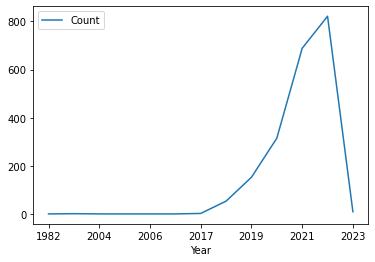

In [7]:
print(year.plot.line(x="Year", y="Count"))
print(year)

In [8]:
print(src_title.sort_values(by=["Count"], ascending=False))

                                               Source  Count
25                                             Others   1186
18  Lecture Notes in Computer Science (including s...    253
3                           CEUR Workshop Proceedings    139
10                                        IEEE Access     54
1                      Applied Sciences (Switzerland)     40
0      ACM International Conference Proceeding Series     39
4   Communications in Computer and Information Sci...     37
11     IEEE International Conference on Fuzzy Systems     31
15  International Conference on Intelligent User I...     29
6   Conference on Human Factors in Computing Syste...     25
23                                            Sensors     21
2                             Artificial Intelligence     21
13  IJCAI International Joint Conference on Artifi...     17
19              Lecture Notes in Networks and Systems     16
14                                 Information Fusion     15
24              Studies 

In [9]:
print(doc_type)

                Type  Count
0            Article    777
1       Book Chapter     43
2   Conference Paper   1119
3  Conference Review     41
4             Review     65
5             Others      6


In [10]:
#Guardar os vários documentos vistos até agora para posterior análise em Excel
save_file = "year.csv"
year.to_csv(save_file, index=False, sep=";", encoding="ansi")

save_file = "src.csv"
src_title.to_csv(save_file, index=False, sep=";", encoding="ansi")

save_file = "doc.csv"
doc_type.to_csv(save_file, index=False, sep=";", encoding="ansi")




In [11]:
pair = []
cols = ["Keyword", "Count"]
for key, value in keyword_count.items():
    key_count = [key, value]
    pair.append(key_count)

NameError: name 'keyword_count' is not defined

In [ ]:
pair_final = pd.DataFrame(pair, columns=cols)
save_file = "Keywords_final.csv"
pair_final.to_csv(save_file, index=False, sep=";", encoding="ansi")

In [ ]:
#CATEGORIAS, NÃO UTILIZADO!


In [32]:
keyword_count = {}
for item in key_file.values:
    item_split = str(item).split("<")
    for keyword in item_split[1:-1]:
        
        keyword_dict = keyword.strip().lower()
        print(keyword_dict)
        if keyword_count.get(keyword_dict, 0) != 0:
            keyword_count[keyword_dict] += 1
        else:
            keyword_count[keyword_dict] = 1

cognitive psychology
cognitive science
explainability
explanation
human observers
interpretability
social expectations
social psychology
game theory
machine learning
medical problems
polynomial approximation
chronic kidney disease
interpretability
machine learning models
machine learning problem
nonlinear interactions
nonlinear predictive models
polynomial-time algorithms
risk characteristics
learning systems
machine learning
best practices
complex machines
future research directions
internal systems
interpretability
level of detail
thought process
training data
medicine
artificial intelligence in medicine
causability
explainability
fundamental concepts
histopathology
human centricities
machine learning methods
probabilistic learning
human computer interaction
ai applications
ai systems
end users
evaluation framework
explanation interfaces
human users
task performance
autonomous decision
critical applications
diverse range
human users
artificial intelligence
artificial intelligence
rev

performance benefits
sociotechnical
technical factors
case-based reasoning approaches
confidence estimation
confidence measure
confidence values
decision support system (dss)
modeling behaviour
multiple data sets
understandability
health care delivery
health care personnel
hospital mortality
human
information processing
machine learning
pediatric intensive care unit
psychology
qualitative research
child
delivery of health care
focus groups
health personnel
hospital mortality
humans
intensive care units, pediatric
machine learning
ethical aspects
learning systems
risk management
robustness (control systems)
transparency
epistemology
explanation
methodology
objectivity
philosophy
forestry
genetic algorithms
genetic programming
learning algorithms
multilayer neural networks
multiobjective optimization
network layers
black boxes
black-box model
complex machines
evolutionary multi-objectives
global modeling
multi objective
particular algorithms
state of the art
machine learning
man machine 

deep learning
diagnosis
forecasting
image segmentation
magnetic resonance imaging
neural networks
tumors
brain tumor segmentation
brain tumors
diagnostic procedure
explainable artificial intelligence
interpretability
medical image segmentation
segmentation models
tumour detection
visual explanation
visual interpretability
medical imaging
brain
brain tumor
diagnostic imaging
human
image processing
nuclear magnetic resonance imaging
brain
brain neoplasms
humans
image processing, computer-assisted
magnetic resonance imaging
controlled experiment
counterfactuals
data manifolds
image data
learning models
novel methods
recent progress
test images
benchmark evaluation
counterfactuals
roadmap
scientific progress
deep learning
lime
automated applications
breast cancer
chest x-rays
classification tasks
empirical evaluations
learning models
security and privacy
wisconsin
quality control
reinforcement learning
turing machines
clinical decision support systems
functional abilities
human-centered de

watersheds
biological data
black box approach
end to end
artificial intelligence
human computer interaction
surveys
agent based simulation
cognitive loads
human agent
human users
mann-whitney u test
package delivery
understandability
user satisfaction
machine learning
technical presentations
transparency
artificial intelligent
design decisions
development process
explainable ml
machine learning models
meta information
position papers
provenance
biomarkers
diagnosis
forecasting
gene expression
neural networks
specific heat
cancer genomics
convolutional neural network
feature importance
gene expression data
gradcam
interpretability
neural network model
quantitative and qualitative analysis
deep neural networks
forecasting
formal logic
first order logic
input layers
local model
local prediction
local region
predictive performance
propositionalization
random selection
deep neural networks
fuzzy clustering
fuzzy inference
fuzzy neural networks
fuzzy sets
learning systems
automated features


medical fields
systematic mapping
systematic review
xai
intelligent systems
learning algorithms
decisions makings
end users' perceptions
explainability
machine learning algorithms
machine-learning
modeling performance
performance
tradeoff
user-centred
xai
bone
cells
cytology
deep learning
diagnosis
disease control
image processing
immune system
lime
blood cancer
blood cells
bone marrow
cell-be
cell/b.e
cell/be
children and adolescents
lymphocytic leukemia
transfer learning methods
white blood cells
diseases
adolescent
artificial intelligence
child
human
image processing
leukemia
machine learning
procedures
reproducibility
adolescent
artificial intelligence
child
humans
image processing, computer-assisted
leukemia
machine learning
ai systems
algorithmic prediction
decision-making process
decisions makings
explainability
explainable ai
fairness
fairness judgements
gain insight
social expectations
natural language processing systems
syntactics
black boxes
explainable ai
natural language u

evaluation results
quantitative evaluation
quantitative metrics
sensitivity check
arabidopsis protein
phya protein, arabidopsis
phye protein, arabidopsis
phytochrome
phytochrome a
phytochrome c, arabidopsis
arabidopsis
biological model
circadian rhythm
ecotype
gene expression profiling
gene expression regulation
genetics
machine learning
physiology
regulatory sequence
apoproteins
arabidopsis
arabidopsis proteins
circadian clocks
circadian rhythm
ecotype
gene expression profiling
gene expression regulation, plant
machine learning
models, biological
phytochrome
phytochrome a
black boxes
deep learning
detection system
disease detection
explainable ai
grad-cam++
human users
nested structures
performance
plant disease
convolutional neural networks
deep neural networks
image classification
ophthalmology
optical tomography
textures
convolutional neural network
disease classification
explainable ai
features extraction
filter kernel
image features
images classification
macular disease
retinal o

data mining
decision trees
gaussian distribution
learning systems
signal encoding
anomaly detection
auto encoders
computational modelling
encodings
explainable artificial intelligence (xai)
interpretable artificial intelligence
neural-networks
one class-svm
tree-based
k-means clustering
machine learning
neural networks
black box modelling
differentiable programming
k-means
k-means++ clustering
neural clustering
neural-networks
parallel com- puting
stochastic k-mean clustering
stochastics
transparent neural network
laws and legislation
risk assessment
ai systems
anti-money laundering
black boxes
consumer credits
credit risks
explainable ai
financial sectors
netherlands
semi structured interviews
supervisory authority
artificial intelligence systems
black boxes
civil laws
common law
complex problems
explainability
explainable artificial intelligence (xai)
further development
legal concern
liability
artificial intelligence
dna fingerprinting
forensic science
machine learning
prediction
sh

machine learning models
pocket cards
state of the art
deep neural networks
factorization
multilayer neural networks
amazon mechanical turks
decision making process
interpretability
matrix factorizations
mission critical
state-of-the-art performance
time series classifications
training procedures
graph theory
graphic methods
lime
graph edges
graph-based
machine learning models
nuclear energy
nuclear fuels
nuclear reactor accidents
answer set programming
nuclear accidents
severe accident
state variables
knowledge management
complex machines
discretization method
experimental evaluation
if-then rules
low fidelities
numerical attributes
simple method
textual data
knowledge management
knowledge representation
semantic web
semantics
text processing
interpretability
knowledge graphs
misclassifications
modeling behaviour
neural network model
neural networks model
relevance score
text classification
embedded systems
industrial electronics
semantics
flexible manufacturing
key feature
manufacturi

article
artificial intelligence
controlled study
diagnostic test accuracy study
human
international normalized ratio
machine learning
overall survival
patient risk
predictive value
protein function
receiver operating characteristic
risk assessment
sepsis
survival prediction
artificial intelligence
fibronectins
humans
machine learning
roc curve
behavioral research
convolution
convolutional neural networks
decision making
deep neural networks
learning systems
accelerometer data
activation mapping
biometric user identification
convolutional neural network
deep learning
explainable ai
grad-cam
human activity recognition
one-dimensional
user identification
biometrics
biometry
factual database
human
human activities
biometric identification
databases, factual
human activities
humans
muscle
public health
risk factor
symptom
absenteeism
adult
article
artificial intelligence
decision making
decision tree
ergonomics
female
human
longitudinal study
machine learning
male
musculoskeletal disease
na

decision-making process
expert’s knowledge
explainable ai
features extraction
machine learning algorithms
prototype
shape
task analysis
large dataset
medical computing
medical imaging
chest x-ray
clinical practices
human-friendly
large-scales
limited information
natural language explanations
natural languages
xai
chronic illness
data set
health condition
health tracking
in-progress research
log information
self-reported data
self-tracking
tracking data
forecasting
image classification
lime
superpixels
textures
automated evaluation
explainability
human expert
image patches
images classification
in-buildings
individual prediction
machine learning models
super pixels
image classification
bias
biasing effects
data annotation
de-biasing
explainable ai
lesion classification
network-based
skin lesion
skin lesion classification
synthetic data
diseases
endoscopy
learning systems
long short-term memory
machine components
medical imaging
black boxes
captioning
colonoscopy
convolutional neural net

medical diagnostics
medical image classification
state-of-the-art machine learning methods
xai
'current
analysis models
black boxes
evaluation framework
human judgments
non linear
offline
performance
sentiment analysis
social settings
learning systems
neurology
clinical use
deep learning
disease classification
explainable artificial intelligence
health care application
healthcare
high-accuracy
interpretability
learning models
neurological disease
forecasting
program debugging
software testing
testing
explainable artificial intelligence (xai)
fault localization
localization technique
model-agnostic explanation technique
program units
spectra's
spectrum-based fault localization
test case
testing and debugging
ai applications
auto encoders
case-studies
data driven
dip-vae model
financial service
interpretability
protodash explainer
responsible ai
xai
cluster computing
clustering algorithms
deep neural networks
entropy
feedback
learning systems
anomaly detection
anomaly detection systems
a

ai algorithms
classification accuracy
conceptual frameworks
human cognition
human understanding
logic reasoning
reasoning process
sensemaking
ai systems
artificial intelligence research
artificial intelligence techniques
daily lives
end-user perspective
user perspectives
learning systems
numerical methods
perturbation techniques
semantics
supervised learning
auto encoders
black-box model
important features
numerical experiments
output vectors
semantic similarity
synthetic data
weakly supervised learning
decision trees
extraction
forestry
learning systems
machine components
marketing
contribution analysis
defragtree
ensemble learning
latent dirichlet allocation
mobile advertizing
model learning
topic modeling
video advertisings
xai(explainable ai)
xgboost
robotics
ai techniques
dangerous situations
robot performance
convolutional neural networks
learning algorithms
machine learning
classification accuracy
classification results
distance metric learning
elimination process
large margin n

interacting entities
multi-agent learning
state representation
practical reasoning
computer science
computers
application scenario
black-box model
data type
end users
feature transformations
model interpretations
user friendly
classification (of information)
computer aided instruction
diseases
forecasting
image segmentation
lime
mammography
medical computing
medical imaging
predictive analytics
x ray screens
cancer prediction
classification performance
human lives
image segments
training data
graph theory
knowledge representation
machine learning
recommender systems
complex algorithms
data sparsity problems
feature vectors
graph embeddings
knowledge graphs
recommendation algorithms
research questions
social information
intelligent agents
semantics
stairs
argumentation semantics
argumentation theory
argumentation-based agent
extended model
fine-grained analysis
future research directions
machine learning
military operations
transparency
bandwidth-constrained
design considerations
explan

In [33]:
keyword_count

{'cognitive psychology': 8,
 'cognitive science': 9,
 'explainability': 80,
 'explanation': 38,
 'human observers': 3,
 'interpretability': 201,
 'social expectations': 3,
 'social psychology': 3,
 'game theory': 19,
 'machine learning': 335,
 'medical problems': 4,
 'polynomial approximation': 3,
 'chronic kidney disease': 2,
 'machine learning models': 141,
 'machine learning problem': 1,
 'nonlinear interactions': 1,
 'nonlinear predictive models': 1,
 'polynomial-time algorithms': 2,
 'risk characteristics': 1,
 'learning systems': 152,
 'best practices': 1,
 'complex machines': 10,
 'future research directions': 6,
 'internal systems': 1,
 'level of detail': 2,
 'thought process': 2,
 'training data': 16,
 'medicine': 2,
 'artificial intelligence in medicine': 1,
 'causability': 4,
 'fundamental concepts': 3,
 'histopathology': 4,
 'human centricities': 1,
 'machine learning methods': 18,
 'probabilistic learning': 1,
 'human computer interaction': 31,
 'ai applications': 9,
 'ai 

In [35]:
pair = []
cols = ["Keyword", "Count"]
for key, value in keyword_count.items():
    key_count = [key, value]
    pair.append(key_count)

In [36]:
pair_final = pd.DataFrame(pair, columns=cols)
save_file = "Keywords_final.csv"
pair_final.to_csv(save_file, index=False, sep=";", encoding="ansi")